# Displaying results for the signal detection benchmark

This notebooks loads the results of the benchmark and generates the figures shown in the paper.

In [8]:
from mcsm_benchs.Benchmark import Benchmark
from mcsm_benchs.ResultsInterpreter import ResultsInterpreter
from mcsm_benchs.SignalBank import SignalBank

import scipy.stats as spst
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
from numpy import pi as pi
import scipy.signal as sg
import matplotlib.pyplot as plt
from src.utilities.utilstf import get_spectrogram
import os

In [9]:
# Load the benchmark results
filename = os.path.join('..','results','last_benchmark_detection')
benchmark = Benchmark.load_benchmark(filename)

# Load interpreter.
interpreter = ResultsInterpreter(benchmark)

In [10]:
# Check DataFrame of results.
df = interpreter.get_benchmark_as_data_frame()

df = df[df['Parameter']!="{'statistic': 'Frs', 'pnorm': 2, 'rmax': 0.5, 'MC_reps': 2499}"]
df = df[df['Parameter']!="{'statistic': 'Frs_vs', 'pnorm': 2, 'rmax': 0.5, 'MC_reps': 2499}"]
df = df[df['Parameter']!="{'statistic': 'Frs_vs', 'pnorm': 2, 'rmax': 2.0, 'MC_reps': 2499}"]
df = df[df['Parameter']!="{'statistic': 'Frs', 'pnorm': 2, 'rmax': 2.0, 'MC_reps': 2499}"]

df

,Method,Parameter,Signal_id,Repetition,-5,0,5,10
38000,global_mad_test,"{'statistic': 'Frs', 'MC_reps': 2499}",LinearChirp,0,False,False,True,True
38001,global_mad_test,"{'statistic': 'Frs', 'MC_reps': 2499}",LinearChirp,1,False,False,True,True
38002,global_mad_test,"{'statistic': 'Frs', 'MC_reps': 2499}",LinearChirp,2,False,False,False,True
38003,global_mad_test,"{'statistic': 'Frs', 'MC_reps': 2499}",LinearChirp,3,False,False,False,True
38004,global_mad_test,"{'statistic': 'Frs', 'MC_reps': 2499}",LinearChirp,4,False,False,False,True
...,...,...,...,...,...,...,...,...
19995,monte_carlo_test,"{'statistic': 'Frs_vs', 'pnorm': 2, 'rmax': 1....",LinearChirp,1995,False,True,True,True
19996,monte_carlo_test,"{'statistic': 'Frs_vs', 'pnorm': 2, 'rmax': 1....",LinearChirp,1996,False,False,True,True
19997,monte_carlo_test,"{'statistic': 'Frs_vs', 'pnorm': 2, 'rmax': 1....",LinearChirp,1997,False,True,True,True
19998,monte_carlo_test,"{'statistic': 'Frs_vs', 'pnorm': 2, 'rmax': 1....",LinearChirp,1998,False,False,True,True


In [11]:
# Use this function only for the CP CI shown in the interactive figures using Plotly:
def clopper_pearson(x, alpha=0.05, bonferroni=1):
    """
    Clopper-Pearson confidence interval for Bernoulli parameter
    alpha: confidence level
    k: number of successes
    n: number of observations
    """
    alpha = alpha/bonferroni
    n = len(x) # k: number of successes
    k = sum(x) # n: number of observations
    lb = np.mean(x) - spst.beta.ppf(alpha/2, k, n-k+1)
    ub = spst.beta.ppf(1 - alpha/2, k+1, n-k)-np.mean(x)
    return lb, ub

cp_ci = lambda x: clopper_pearson(x, alpha=0.05, bonferroni=8)

In [12]:
# Report shown in the repo 
interpreter.save_report(path='../results', 
                        link='https://jmiramont.github.io/benchmarks-detection-denoising/results/detection')

# Interactive figures shown in the repo
interpreter.get_html_figures(df=df, varfun=cp_ci, path='../results/detection', bars=True)

# .csv files for sharing results
interpreter.get_csv_files(path='../results/detection')

/home/juan/Nextcloud/Miramont_Juan/python_code/benchmark-test/.venv/lib/python3.10/site-packages/mcsm_benchs/ResultsInterpreter.py:124: RuntimeWarning:

Mean of empty slice.

/home/juan/Nextcloud/Miramont_Juan/python_code/benchmark-test/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:184: RuntimeWarning:

invalid value encountered in divide

/home/juan/Nextcloud/Miramont_Juan/python_code/benchmark-test/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning:

Degrees of freedom <= 0 for slice

/home/juan/Nextcloud/Miramont_Juan/python_code/benchmark-test/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:226: RuntimeWarning:

invalid value encountered in divide

/home/juan/Nextcloud/Miramont_Juan/python_code/benchmark-test/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:258: RuntimeWarning:

invalid value encountered in divide

/home/juan/Nextcloud/Miramont_Juan/python_code/benchmark-test/.venv/lib/python3.10/site-packages/numpy/core/fro

True

In [13]:
# Use this function for the CP CI shown in the interactive figures using matplotlib:
def clopper_pearson(x, alpha=0.05, bonferroni=1):
    """
    Clopper-Pearson confidence interval for Bernoulli parameter
    alpha: confidence level
    k: number of successes
    n: number of observations
    """
    alpha = alpha/bonferroni
    n = len(x) # k: number of successes
    k = sum(x) # n: number of observations
    lb = spst.beta.ppf(alpha/2, k, n-k+1) 
    ub = spst.beta.ppf(1 - alpha/2, k+1, n-k)
    return lb, ub

cp_ci = lambda x: clopper_pearson(x, alpha=0.05, bonferroni=8)

LinearChirp


/tmp/ipykernel_12413/1850814160.py:59: UserWarning:

FixedFormatter should only be used together with FixedLocator



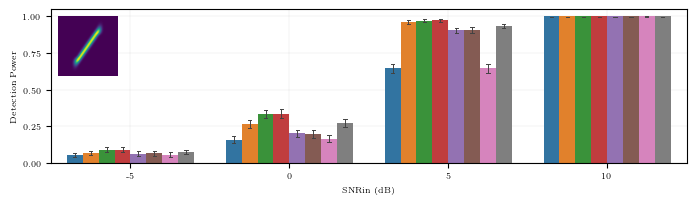

<Figure size 820x200 with 0 Axes>

In [14]:
# Fix new legends.
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

new_legends = [
            r'Global MAD-$F$',
            r'Global MAD-$\widetilde{F}$',
            r'Rank-$\widetilde{F}$-$r\in[0.65;1.05]$',
            r'Rank--$F$-$r\in[0.65;1.05]$',
            r'Rank-$\widetilde{F}$',
            r'Rank--$F$',
            r'MC-$F$-$r_{\max}=1.0$',
            r'MC-$\widetilde{F}$-$r_{\max}=1.0$',
            ]

# Set figure size (in inches):
fig_size_w = 8.2
fig_size_h = 2

# Get Figures as bar plots.
errbar_params = {'errwidth':0.7,
                'capsize':0.02,
                }

figs = interpreter.get_summary_plots(size = (fig_size_w,fig_size_h),
                                        filter_crit='any',
                                        filter_str=['global',"'pnorm': 2, 'rmax': 1.0,"],
                                        errbar_fun=cp_ci, 
                                        savetofile=False, 
                                        plot_type='bars',
                                        errbar_params=errbar_params
                                        )

for i, fig in enumerate(figs):
    # Get signal the signal for each figure and compute spectrogram
    ax = fig.axes[0]
    s = benchmark.signal_dic['LinearChirp']() 
    S, stft  = get_spectrogram(s)
    ax = fig.axes[0]

    # Set inset axis with the spectrogram of the signal
    axins = inset_axes(ax, width=0.6, height=0.6, loc=2)
    axins.imshow(S, origin='lower')
    axins.axis('off')
    fig.canvas.draw()
    axins.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)

    #Uncomment to remove legends from figure (they are print in another figure)
    ax.get_legend().remove()
    
    # h, l  = ax.get_legend_handles_labels()
    # ax.legend(h, new_legends, fontsize='small', frameon=False, loc=(0, 1.1), ncol=4)
    ax.set_title('',fontsize=6)
    ax.set_ylabel(ax.get_ylabel(),fontsize=6)
    ax.set_xlabel(ax.get_xlabel(),fontsize=6)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=6)
    ax.set_ylim((0,1.05))
    fig.canvas.draw()
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=6)
    
    # Save figure
    filename = os.path.join('figures','power_'+str(i)+'_2.pdf')
    fig.savefig(filename, dpi=900, transparent=False, bbox_inches='tight')

# Get legends in a different figure
legendFig = plt.figure()
legendFig.set_size_inches((fig_size_w,fig_size_h))

h,_ = figs[0].axes[0].get_legend_handles_labels()
legendFig.legend(h, new_legends, fontsize='small', frameon=False, loc='center', ncol=8)
legendFig.canvas.draw()

# Save figure with legends
filename = os.path.join('figures','legend_power.pdf')
legendFig.savefig(filename, dpi=900, transparent=False, bbox_inches='tight')

plt.show()